In [825]:
import pandas as pd
import numpy as np
import pygad

# num_solutions = 10
# population_1D_vector = numpy.zeros(shape=(num_solutions, 8))
# population_1D_vector


In [826]:
xs = [8, 50, 18, 35, 90, 40, 84, 74, 34, 40, 60, 74]
ys = [3, 62, 0, 25, 89, 71, 7, 29, 45, 65, 69, 47]
cities = ['Z', 'P', 'A', 'K', 'O', 'Y', 'N', 'X', 'G', 'Q', 'S', 'J']
locations = list(zip(xs, ys, cities))
# for x, y, name in zip(xs, ys, cities):
#     global locations
#     locations.append(Location(name, x, y))

In [827]:
# for solution_idx in range(12):
#     initial_queens_y_indices = numpy.random.rand(8)*8
#     initial_queens_y_indices = initial_queens_y_indices.astype(numpy.uint8)
#     population_1D_vector[solution_idx, :] = initial_queens_y_indices
# print(population_1D_vector)        

In [828]:


# def initialize_population(self, *args):
#     self.num_solutions = 12

#     self.reset_board_text()

#     self.population_1D_vector = numpy.zeros(shape=(self.num_solutions, 12))

#     for solution_idx in range(self.num_solutions):
#         initial_queens_y_indices = numpy.random.rand(8)*8
#         initial_queens_y_indices = initial_queens_y_indices.astype(numpy.uint8)
#         self.population_1D_vector[solution_idx, :] = initial_queens_y_indices

#     self.vector_to_matrix()

#     self.pop_created = 1
#     self.num_attacks_Label.text = "Initial Population Created."
# 紀錄修正前後的染色體
def set_solution_map(sol, repaired_sol):
    sol_str = "".join(str(x) for x in sol) # 串接陣列內各元素
    if sol_str in solution_map:
        pass
    else:
        solution_map[sol_str] = repaired_sol

# 校正染色體 (因交配後的染色體中，各 job 出現的次數可能不同)
def repair(solution):
    # print('before repairment')
    repaired_sol = solution.tolist()
    job_count = {}
    larger,less = [],[]
 
    for i in range(1, 13):
        if i in repaired_sol:
            count = repaired_sol.count(i) # 染色體中，job i 出現的次數
            pos = [pstni for pstni, pstnj in enumerate(repaired_sol) if pstnj == i]
            #pos = repaired_sol.index(i) # 染色體中，job i 出現的位置
            job_count[i] = [count,pos]
        else:
            count = 0
            job_count[i] = [count, 0]
        
        if count > 1:
            larger.append(i) # 'larger' 紀錄染色體中，出現超過 num_mc 次的 job
        elif count == 0: # 'less' 紀錄染色體中，出現少於 num_mc 次的 job
            less.append(i)
            
    # 一一校正 lager 中各 job
# repair start [ 2  9  7  3 11  7  8 12  1  3  1  6] larger:  [1, 3, 7] less:  [4, 5, 10]
# 1 2 ==> [4, 5, 10]
# 12 4
# 3 2 ==> 4
    
    # print("repair start",solution, "larger: ",larger,"less: ",less,job_count)
    for k in range(len(larger)):
        d=0
        chg_job = larger[k]
        #print('change item :',chg_job,  ', postion ',job_count[chg_job],'==>',less)
        
        while job_count[chg_job][0] > 1:
            fixPos = 1
            for data in job_count[chg_job][1]:
                if fixPos==1:
                    pass
                else:
                    # print(chg_job," ============",data)
                    # print( less)
                    # print( repaired_sol[data])
                    #print(job_count[chg_job][0] ," post",job_count[chg_job][1],' less', less[0])

                    #print("repair:",repaired_sol )
                    repaired_sol[data] = less[0]
                  
                    #print("repair:",repaired_sol )

                    job_count[chg_job][0] = job_count[chg_job][0] - 1
                    less.pop(0)
                    #print( less)

                fixPos+=1
            # job_count[less[d]][0] = job_count[less[d]][0] + 1
         
        # while job_count[chg_job][0] > num_genes:
        #     for d in range(len(less)):
        #         if job_count[less[d]][0] < num_genes:
        #             repaired_sol[job_count[chg_job][1]] = less[d]
        #             # 更新 job_count
        #             job_count[chg_job][1] = repaired_sol.index(chg_job)
        #             job_count[chg_job][0] = job_count[chg_job][0] - 1
        #             job_count[less[d]][0] = job_count[less[d]][0] + 1
        #         if job_count[chg_job][0] == num_mc:
        #             break     
        
    # print('after repairment')
    # print(repaired_sol)
    set_solution_map(solution, repaired_sol)
    # print(repaired_sol)
    return repaired_sol

def fitness_func(solution, solution_idx):

    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    # output = numpy.sum(solution*function_inputs)
    # fitness = 1.0 / numpy.abs(output - desired_output)
    repaired_sol = solution#repaired_sol = repair(solution)
    #print("fitness_func",solution)
    total_length = 0
    itemidx=0
   
    for loc in solution:
        
        if  itemidx+1==solution.size :
             
            cityidx1 = loc-1
            cityidx2 =solution[itemidx-1]-1 
            total_length +=((xs[cityidx1] - xs[cityidx2]) ** 2 + (ys[cityidx1] - ys[cityidx2]) ** 2) ** (1 / 2)  
            
            #print("fitness_func Final",itemidx,cityidx1,cityidx2)
            #print("fitness_func Final",xs[cityidx1],ys[cityidx1], xs[cityidx2], ys[cityidx2],total_length )
            if ((xs[cityidx1] - xs[cityidx2]) ** 2 + (ys[cityidx1] - ys[cityidx2]) ** 2) ** (1 / 2)  <0:
                print('ERROR',((xs[cityidx1] - xs[cityidx2]) ** 2 + (ys[cityidx1] - ys[cityidx2]) ** 2) ** (1 / 2)  )
            # print(xs[cityidx1],ys[cityidx1], xs[cityidx1], ys[cityidx2],total_length )
            
            cityidx1 = solution[itemidx]-1
            cityidx2 =solution[0]-1 
            total_length +=((xs[cityidx1] - xs[cityidx2]) ** 2 + (ys[cityidx1] - ys[cityidx2]) ** 2) ** (1 / 2)  
            #print("fitness_func Final",xs[cityidx1],ys[cityidx1], xs[cityidx2], ys[cityidx2],total_length )
            # print(total_length)
            #print("fitness_func Final",itemidx,cityidx1,cityidx2)
        elif itemidx>0 :
           
            cityidx1 = loc-1
            cityidx2 =solution[itemidx-1]-1   
            total_length +=((xs[cityidx1] - xs[cityidx2]) ** 2 + (ys[cityidx1] - ys[cityidx2]) ** 2) ** (1 / 2)  
            # print("fitness_func",itemidx,cityidx1,cityidx2)
            #print(xs[cityidx1],ys[cityidx1], xs[cityidx2], ys[cityidx2],total_length )
       
        itemidx += 1
    #print("fitness_func",total_length,solution,solution_idx)    
    #return total_length*-1 #fitness
    print(solution,total_length,1000/total_length)
    return 1000/total_length

fitness_function = fitness_func

def on_start(ga_instance):
    print("on_start()")

def on_fitness(ga_instance, population_fitness):
    print("on_fitness()")

def on_parents(ga_instance, selected_parents):
    print("on_parents()")

def on_crossover(ga_instance, offspring_crossover):
    # 1) Apply your mutation on the solutions in the offspring_crossover array.
    # Assume the mutation offspring is saved in the offspring_mutation array.
    #offspring_mutation  = mut(offspring_crossover)
    print("on_crossover")
    index=0
    offspring_mutation =offspring_crossover
    for sol in offspring_crossover:
        offspring_mutation[index]=repair(sol)
        index+=1
    # 2) Save the result in the last_generation_offspring_mutation attribute of ga_instance:
    #print("on_crossover",offspring_mutation)
    ga_instance.last_generation_offspring_mutation = offspring_mutation

    # The previous links makes the next population to use your mutation offspring.

def on_mutation(ga_instance, offspring_mutation):
    print("on_mutation()")
    index=0
   
    for sol in offspring_mutation:
        offspring_mutation[index]=repair(sol)
        index+=1
    # 2) Save the result in the last_generation_offspring_mutation attribute of ga_instance:
    print(offspring_mutation)
    ga_instance.last_generation_offspring_mutation = offspring_mutation

def on_generation(ga_instance):
    print("on_generation()")

def on_stop(ga_instance, last_population_fitness):
    print("on_stop()")



In [829]:
solution_map = {} # key: source solution, value: repaired solution

In [830]:

num_generations = 100  # Number of generations.
num_parents_mating = 2 # Number of solutions to be selected as parents in the mating pool.

parent_selection_type = "rws" # Type of parent selection.
# The parent selection type. Supported types are sss (for steady-state selection), rws (for roulette wheel selection), sus (for stochastic universal selection), rank (for rank selection), random (for random selection), and tournament (for tournament selection).
keep_parents = -1 # Number of parents to keep in the next population. -1 means keep all parents and 0 means keep nothing.

# To prepare the initial population, there are 2 ways:
# 1) Prepare it yourself and pass it to the initial_population parameter. This way is useful when the user wants to start the genetic algorithm with a custom initial population.
# 2) Assign valid integer values to the sol_per_pop and num_genes parameters. If the initial_population parameter exists, then the sol_per_pop and num_genes parameters are useless.
sol_per_pop = 100 # Number of solutions in the population.
#隨機產生30個1-10數值的染色體, 利用整除job數量的餘數(數值落在1-10之間)作為n個job number, 每個job出現m次
#-->隨機產生30個 seq list
#num_genes = len(function_inputs)
num_genes = 12 #每個染色體共有 n=10 = 10  個基因

init_range_low = 1
init_range_high = 12


crossover_type = "single_point" # Type of the crossover operator.

# Parameters of the mutation operation.
mutation_type = "swap" # Type of the mutation operator.
#mutation_type=None
mutation_percent_genes = 10 # Percentage of genes to mutate. This parameter has no action if the parameter mutation_num_genes exists or when mutation_type is None.

last_fitness = 0

In [831]:

population_list=[]
gene_space = [i for i in range(1, 13)]
for i in range(sol_per_pop-2):

    nxm_random_num=list(np.random.permutation(gene_space)) 
    #有順序的可屬數物件打亂、隨機排列的方法。

    population_list.append(nxm_random_num) # add to the population_list
population_list.append(np.array([3,1,4,9,6,10,2,11,12,5,7,8]).tolist())
population_list.append(np.array([12,4,8,2,10,6,11,3,7,1,9,5]).tolist())
#population_list

In [832]:


def callback_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))
    last_fitness = ga_instance.best_solution()[1]

# Creating an instance of the GA class inside the ga module. Some parameters are initialized within the constructor.
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating, 
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop, 
                       initial_population=population_list,
                       num_genes=num_genes,

                       gene_space = gene_space, #  
                    #    init_range_low=init_range_low,
                    #    init_range_high=init_range_high,

                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       

                       # callback
                       on_generation=callback_generation,

                       on_start=on_start,
                       on_fitness=on_fitness,
                       on_parents=on_parents,
                       on_crossover=on_crossover,
                       on_mutation=on_mutation,
                     
                       on_stop=on_stop
                       )

In [833]:
ga_instance.population.shape

(100, 12)

In [834]:
#ga_instance.population

In [835]:
ga_instance.run()

 10  5  9  8  1] 614.361315276313 1.627706652640138
[ 3 12  5 11  6  1  2 10  7  9  8  4] 580.3457523720399 1.723110742023548
[ 2 10  7  9  6  4  3 12  5 11  8  1] 589.0770151306697 1.697570902130987
[ 3 12  5  9  6  4  2 10  7 11  8  1] 575.6317152316409 1.737221861720368
[ 2 12  7  9  6  4  3 10  5 11  8  1] 581.3985447197142 1.719990545353169
[ 3 10  5 11  6  4  2 12  7  9  8  1] 523.2274770045484 1.9112146130492818
[ 2 12  7  9  8  4  3 10  5 11  6  1] 572.6672819610843 1.7462146546516955
[ 2 10  7  9  6  4  3 12  5 11  8  1] 589.0770151306697 1.697570902130987
[ 2 10  7  9  6  4  3 12  5 11  8  1] 589.0770151306697 1.697570902130987
[ 3 12  5 11  6  1  2 10  7  9  8  4] 580.3457523720399 1.723110742023548
[ 2 12  7  9  8  4  3 10  5 11  6  1] 572.6672819610843 1.7462146546516955
[ 3 12  7 11  6  4  2 10  5  9  8  1] 548.6974623522029 1.8224979494403255
[ 2 10  5 11  6  4  3 12  7  9  8  1] 562.1427622512317 1.778907542979415
[ 3 12  7  9  6  1  2 10  5 11  8  4] 565.1744967521402 

KeyboardInterrupt: 

In [818]:
# 取得最佳解
solution, solution_fitness, solution_idx = ga_instance.best_solution()

#print("最佳解 : {solution_r}".format(solution_r = solution_map["".join(str(x) for x in solution)]))
print("最佳解 : {solution}".format(solution =solution))
print("最佳解的適應度 : {solution_fitness}".format(solution_fitness = solution_fitness))

if ga_instance.best_solution_generation != -1:
    print("最佳解落在第 {best_solution_generation} 個世代".format(best_solution_generation = ga_instance.best_solution_generation))


print("\n\n\n")

690.200888457585
672.3624119963597
681.2681186389084
681.2681186389084
694.2519984054932
674.5492682953379
652.2222522107757
674.5492682953379
684.6936142469586
686.5578678958886
676.4135219442678
652.2222522107757
684.6936142469586
684.6936142469586
655.6477478188259
676.4135219442678
655.6477478188259
683.1323722878383
684.6936142469586
683.1323722878383
664.5534544613746
655.6477478188259
683.1323722878383
684.6936142469586
655.6477478188259
681.2681186389084
692.3877447565634
672.3624119963597
686.5578678958886
655.6477478188259
692.3877447565634
694.2519984054932
676.4135219442678
684.6936142469586
652.2222522107757
694.2519984054932
655.6477478188259
686.5578678958886
683.1323722878383
684.6936142469586
686.5578678958886
681.2681186389084
683.1323722878383
655.6477478188259
655.6477478188259
684.6936142469586
652.2222522107757
655.6477478188259
686.5578678958886
655.6477478188259
686.5578678958886
684.6936142469586
652.2222522107757
652.2222522107757
692.3877447565634
655.6477478

In [836]:
print( fitness_func(np.array([12,4,8,2,10,6,11,3,7,1,9,5]),1))
print( fitness_func(np.array([3,1,4,9,6,10,2,11,12,5,7,8]),1))
print( fitness_func(np.array([3,9,7,4,12,5,1,10,8,6,11,2]),1))
#3,1,4,9,6,10,2,11,12,5,7,8

[12  4  8  2 10  6 11  3  7  1  9  5] 550.1378652010818 1.8177261796631439
1.8177261796631439
[ 3  1  4  9  6 10  2 11 12  5  7  8] 361.0936216334206 2.7693648962185
2.7693648962185
[ 3  9  7  4 12  5  1 10  8  6 11  2] 646.7149780001492 1.5462762329895647
1.5462762329895647


In [820]:
solution

array([ 3,  9,  7,  4, 12,  5,  1, 10,  8,  6, 11,  2])

In [821]:
print(solution[0],xs[solution[0]-1])
print(solution[0],ys[solution[0]-1])

3 18
3 0


In [822]:
# solutionx=[xs[solution[0]-1]]
# solutiony=[ys[solution[0]-1]]
solutionx=[]
solutiony=[]
for element in solution:
    #print(element)
    solutionx.append(xs[element-1])
    solutiony.append(ys[element-1])

solutionx.append(xs[solution[0]-1])
solutiony.append(ys[solution[0]-1])
#print(solutionx,solutiony)

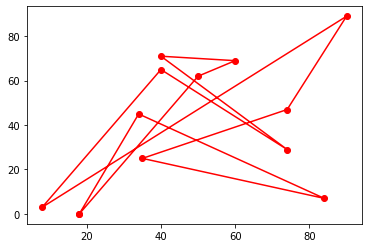

In [823]:
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1, 2)
# best_points_ = np.concatenate([best_points, [best_points[0]]])
# best_points_coordinate = points_coordinate[best_points_, :]
# ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
# ax[1].plot(ga_tsp.generation_best_Y)
# plt.show()


fig, ax = plt.subplots()
ax.plot(solutionx,solutiony, 'o-r')
 
plt.show()